In [13]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os
import sys

sys.path.append("../..")

from blume.process import read, compute, plot_file
from blume.run import Results, ModelParameters
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

In [21]:
T_range = [0.6079, 0.6082]
delta_range = [delta for delta in np.arange(1.965, 1.9665, 0.000005)]
result = Results(varying_param="temperature", range=T_range)
params = ModelParameters(model = "blume", var_range=delta_range, tol=1e-9, max_steps=int(10e9), use_prev=True, chi=24)
result.get(params, sweeping_param="coupling")

temperature=0.60645: 100%|██████████| 300/300 [08:47<00:00,  1.76s/it]


Saving data in folder: '28-06 10:09'
Done 



temperature=0.60655: 100%|██████████| 300/300 [09:08<00:00,  1.83s/it]


Saving data in folder: '28-06 10:09'
Done 



temperature=0.60785: 100%|██████████| 300/300 [09:38<00:00,  1.93s/it]


Saving data in folder: '28-06 10:09'
Done 



temperature=0.6084: 100%|██████████| 300/300 [10:03<00:00,  2.01s/it]


Saving data in folder: '28-06 10:09'
Done 



In [22]:
T_range = [0.6079, 0.6082]
delta_range = [delta for delta in np.arange(1.965, 1.9665, 0.000005)]
delta_range.reverse()
result = Results(varying_param="temperature", range=T_range)
params = ModelParameters(model = "blume", var_range=delta_range, tol=1e-9, max_steps=int(5000), use_prev=True, chi=24)
result.get(params, sweeping_param="coupling")

temperature=0.60645: 100%|██████████| 300/300 [07:33<00:00,  1.51s/it] 


Saving data in folder: '28-06 10:46'
Done 



temperature=0.60655: 100%|██████████| 300/300 [08:05<00:00,  1.62s/it] 


Saving data in folder: '28-06 10:46'
Done 



temperature=0.60785: 100%|██████████| 300/300 [09:38<00:00,  1.93s/it]


Saving data in folder: '28-06 10:46'
Done 



temperature=0.6084: 100%|██████████| 300/300 [09:41<00:00,  1.94s/it]


Saving data in folder: '28-06 10:46'
Done 



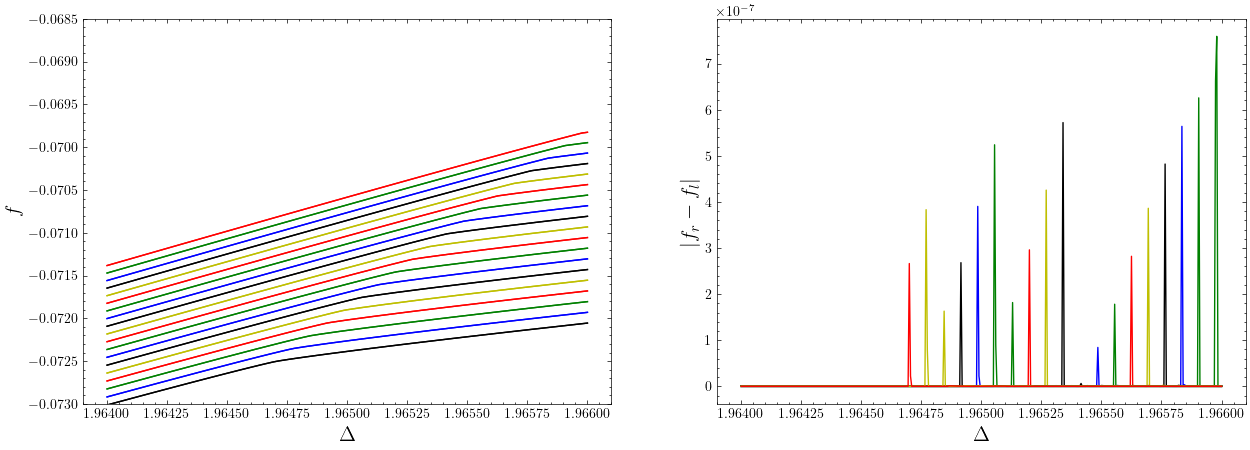

In [8]:
T_range = [T for T in np.arange(0.608, 0.6126, 0.00025)]
colors = ["r", "g", "b", "k", "y"]
fig, axs = plt.subplots(ncols = 2, figsize=(15, 5))
delta_stars = []
max_subtracted = []

for idx, temp in enumerate(T_range):
    data_inv = read('16-06 06:34', f"temperature{temp}")
    data = read('16-06 01:14', f"temperature{temp}")
    energies = compute(Prop.f, data)
    energies_inv = compute(Prop.f, data_inv)
    subtracted = [abs(e1 - e2) for e1, e2 in zip(energies, energies_inv[::-1])]
    axs[0].plot(data["couplings"], energies, label=f"T = {round(temp,4)}", color = colors[idx % 5])
    axs[0].plot(data_inv["couplings"], energies_inv, color = colors[idx % 5])
    max_subtracted.append(max(subtracted))
    idx = subtracted.index(max(subtracted))
    delta_stars.append(data["couplings"][idx])
    axs[1].plot(data["couplings"], subtracted, label = f"T = {round(temp,4)}",  color = colors[idx % 5])


axs[0].set_xlabel("$\Delta$", fontsize = 15)
axs[0].set_ylim(-0.0730, -0.0685)
axs[0].set_ylabel("$f$", fontsize =15)
axs[1].set_xlabel("$\Delta$", fontsize = 15)
axs[1].set_ylabel(r"$|f_r - f_l|$", fontsize =15)

plt.show()

In [4]:
T_range

[0.608,
 0.60825,
 0.6084999999999999,
 0.6087499999999999,
 0.6089999999999999,
 0.6092499999999998,
 0.6094999999999998,
 0.6097499999999998,
 0.6099999999999998,
 0.6102499999999997,
 0.6104999999999997,
 0.6107499999999997,
 0.6109999999999997,
 0.6112499999999996,
 0.6114999999999996,
 0.6117499999999996,
 0.6119999999999995,
 0.6122499999999995,
 0.6124999999999995]

In [9]:
delta_stars

[1.965980000000013,
 1.9659050000000124,
 1.965835000000012,
 1.9657650000000115,
 1.965695000000011,
 1.9656250000000106,
 1.9655550000000102,
 1.9654850000000097,
 1.9654150000000092,
 1.9653400000000087,
 1.9652700000000083,
 1.9652000000000078,
 1.9651300000000074,
 1.9650550000000069,
 1.9649850000000064,
 1.964915000000006,
 1.9648450000000055,
 1.964770000000005,
 1.9647000000000046]

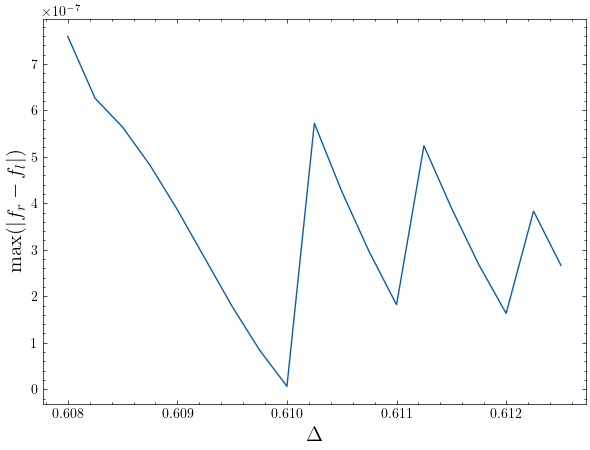

In [8]:
plt.figure(figsize= (7,5))
plt.plot(T_range, max_subtracted, "-")
plt.xlabel("$\Delta$", fontsize=15)
plt.ylabel(r"$\text{max}(|f_r - f_l|)$", fontsize=15)

plt.show()

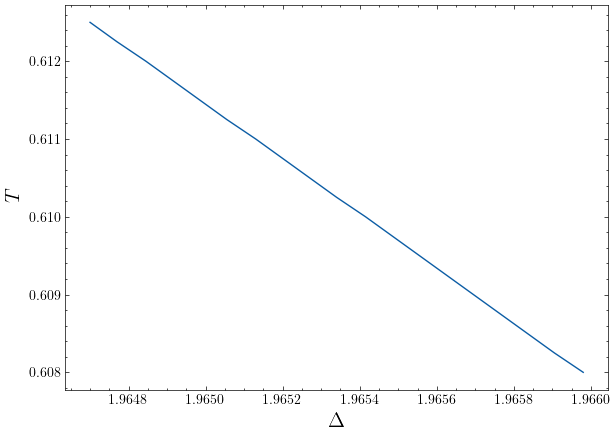

In [9]:
plt.figure(figsize = (7 ,5))
plt.plot(delta_stars, T_range)
plt.xlabel("$\Delta$", fontsize=15)
plt.ylabel("$T$", fontsize=15)
plt.show()

In [18]:
chis = [chi for chi in range(20, 46, 2)]
for idx, coupling in enumerate([1.98788576]):
    params = ModelParameters(var_range=[0.5], tol=1e-10, coupling = coupling)
    result = Results(varying_param="chi", range=chis)
    result.get(params)

chi=20: 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Saving data in folder: '17-06 17:10'
Done 



chi=22: 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


Saving data in folder: '17-06 17:10'
Done 



chi=24: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving data in folder: '17-06 17:10'
Done 



chi=26: 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Saving data in folder: '17-06 17:10'
Done 



chi=28: 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Saving data in folder: '17-06 17:10'
Done 



chi=30: 100%|██████████| 1/1 [00:01<00:00,  1.95s/it]


Saving data in folder: '17-06 17:10'
Done 



chi=32: 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Saving data in folder: '17-06 17:10'
Done 



chi=34: 100%|██████████| 1/1 [00:14<00:00, 14.97s/it]


Saving data in folder: '17-06 17:10'
Done 



chi=36: 100%|██████████| 1/1 [00:05<00:00,  5.72s/it]


Saving data in folder: '17-06 17:10'
Done 



chi=38: 100%|██████████| 1/1 [00:22<00:00, 22.28s/it]


Saving data in folder: '17-06 17:10'
Done 



chi=40: 100%|██████████| 1/1 [00:24<00:00, 24.08s/it]


Saving data in folder: '17-06 17:10'
Done 



chi=42: 100%|██████████| 1/1 [00:10<00:00, 10.58s/it]


Saving data in folder: '17-06 17:10'
Done 



chi=44: 100%|██████████| 1/1 [00:09<00:00,  9.37s/it]

Saving data in folder: '17-06 17:10'
Done 



[0.09117790920753421, 0.011577470066717542, 0.06573574097148145, 0.05352340329513368, 0.020136129655185794, 0.03715797574814987]


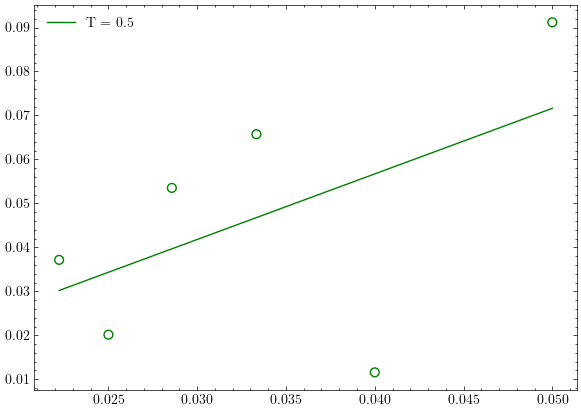

In [17]:
plt.figure(figsize=(7, 5))

model = Model(lambda x, a, b: a*x+b)

colors = ["g", "b", "k", "r", "y"]
for idx, fn in enumerate(["17-06 17:03"]): 
    ref_deltas = []
    inv_corrs = []
    inv_chi = [ ]
    for chi in range(20, 50, 5):
        data = read(fn, f"chi{chi}")
        ref_deltas.extend(compute(Prop.delta, data))
        corrs = compute(Prop.xi, data)
        inv_corrs.append(1/corrs[0])
        inv_chi.append(1/chi)

    print(inv_corrs)
    x, y = inv_chi, inv_corrs
    params = model.make_params(a=0.5, b=0.5, c=0.5)
    result = model.fit(y, params, x=x)
    plt.scatter(x, y,s=40, facecolors="none", edgecolors=colors[idx%5])
    plt.plot(x, result.best_fit, '-', color = colors[idx%5], label=f"T = {data['temperature']}")

plt.legend()
plt.show()



In [4]:
chis = [chi for chi in range(20, 46, 1)]
for idx, coupling in enumerate([1.4167]):
    params = ModelParameters(var_range=[1.2], tol=1e-10, coupling = coupling)
    result = Results(varying_param="chi", range=chis)
    result.get(params, sweeping_param="temperature")

chi=20: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=21: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=22: 100%|██████████| 1/1 [00:18<00:00, 18.86s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=23: 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=24: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=25: 100%|██████████| 1/1 [00:06<00:00,  6.96s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=26: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=27: 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=28: 100%|██████████| 1/1 [00:01<00:00,  1.96s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=29: 100%|██████████| 1/1 [00:13<00:00, 13.59s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=30: 100%|██████████| 1/1 [00:23<00:00, 23.57s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=31: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=32: 100%|██████████| 1/1 [00:10<00:00, 10.39s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=33: 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=34: 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=35: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=36: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=37: 100%|██████████| 1/1 [00:05<00:00,  5.11s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=38: 100%|██████████| 1/1 [00:03<00:00,  3.65s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=39: 100%|██████████| 1/1 [00:03<00:00,  3.45s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=40: 100%|██████████| 1/1 [00:13<00:00, 13.74s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=41: 100%|██████████| 1/1 [00:22<00:00, 22.23s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=42: 100%|██████████| 1/1 [00:05<00:00,  5.37s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=43: 100%|██████████| 1/1 [00:47<00:00, 47.55s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=44: 100%|██████████| 1/1 [00:07<00:00,  7.23s/it]


Saving data in folder: '20-06 13:43(1)'
Done 



chi=45: 100%|██████████| 1/1 [00:16<00:00, 16.31s/it]

Saving data in folder: '20-06 13:43(1)'
Done 



[34.8077073716839, 24.00552220090787, 767.682391439291, 19.716763278490507, 20.022230470631897, 228.43272119529774, 9.2102626832085, 16.223920687790557, 53.50945741696096, 401.33746592002467, 703.4224500396328, 21.709868298213447, 275.43927933902626, 19.256783850983204, 28.922599891471762, 16.171458935710874, 22.98627284955272, 39.680105447285065, 26.874127492728633, 24.01316291381528, 98.01362202073474, 65.83639020611174, 15.894620107595857, 163.651064792893, 19.18900088313762, 47.13418085757711]


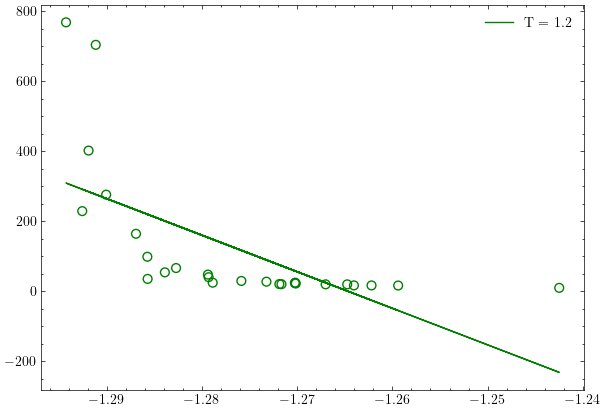

In [6]:
plt.figure(figsize=(7, 5))

model = Model(lambda x, a, b: a*x+b)

colors = ["g", "b", "k", "r", "y"]
for idx, fn in enumerate(["20-06 13:43(1)"]): 
    ref_deltas = []
    inv_corrs = []
    inv_chi = [ ]
    for chi in range(20, 46, 1):
        data = read(fn, f"chi{chi}")
        ref_deltas.extend(compute(Prop.delta, data))
        corrs = compute(Prop.xi, data)
        inv_corrs.append(corrs[0])
        inv_chi.append(1/chi)

    x, y = ref_deltas, inv_corrs
    params = model.make_params(a=0.5, b=0.5, c=0.5)
    result = model.fit(y, params, x=x)
    plt.scatter(x, y,s=40, facecolors="none", edgecolors=colors[idx%5])
    plt.plot(x, result.best_fit, '-', color = colors[idx%5], label=f"T = {data['temperature']}")

plt.legend()
plt.show()


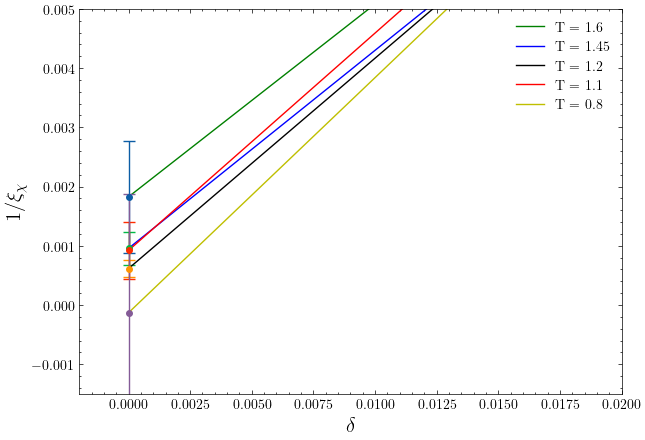

In [36]:
model = Model(lambda x, a, b: a*x + b)

plt.figure(figsize=(7, 5))

xi_infs = []
temps = []

colors = ["g", "b", "k", "r", "y"]

for color_i, folder in enumerate(["20-05 13:44", "20-05 13:57","20-05 14:15", "20-05 13:16", "20-05 14:32"]):

    max_corrs = []
    ref_deltas = []
    for file in os.listdir(os.path.join("../../data", folder)):

        data = read(folder, file[:-5])
        corrs = compute(Prop.xi, data)
        idx = corrs.index(max(corrs))
        max_corrs.append(max(corrs))
        ref_deltas.append(compute(Prop.delta, data)[idx])

    inv_corrs = [1/corr for corr in max_corrs]
    x, y = ref_deltas, inv_corrs
    params = model.make_params(a=0.5, b=0.5)
    result = model.fit(y, params, x=x)
    #plt.scatter(x, y,s=40, facecolors="none", edgecolors=colors[color_i])

    x = [el for el in np.arange(0, 0.25, 0.001)]
    y = [result.params["a"].value*el + result.params["b"].value for el in x]
    plt.plot(x, y, '-', label=f"T = {round(data['temperature'],2)}", color = colors[color_i])
    xi_infs.append((result.params["b"].value, result.params["b"].stderr))
    temps.append(data["temperature"])


plt.xlabel("$\delta$", fontsize=15)
plt.ylabel(r"$1/\xi_{\chi}$", fontsize=15)
plt.ylim(-0.0015, 0.005)
plt.xlim(-0.002, 0.02)
plt.legend()
plt.show()


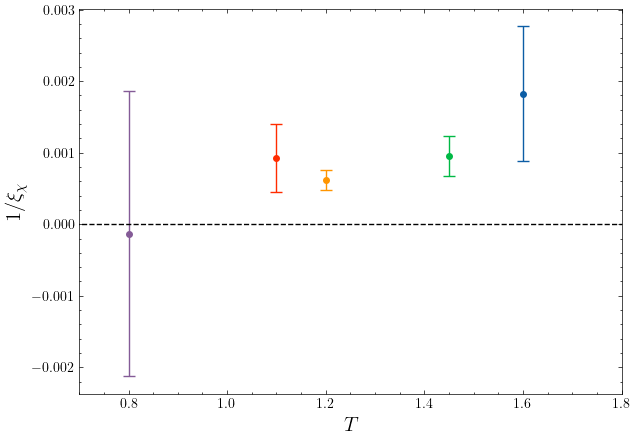

In [44]:
plt.figure(figsize=(7 ,5))
for idx, xi_inf in enumerate(xi_infs):
    plt.errorbar(temps[idx], xi_inf[0], fmt = "o", yerr = xi_inf[1], capsize=4, markersize=4)
plt.xlabel("$T$", fontsize=15)
plt.ylabel(r"$1/\xi_{\chi}$", fontsize=15)
plt.hlines(0, linestyles="--", xmin =0.6, xmax = 2, color="k")
plt.xlim(0.7, 1.8)
plt.show()

In [51]:
def intersect(idx_slice, inv_data, data):
    free_energies = compute(Prop.f, data)
    inv_free_energies = compute(Prop.f, inv_data)

    inv_free_energies.reverse()
    subtracted = [abs(el1 - el2) for (el1, el2) in zip(free_energies, inv_free_energies)]
    subtracted = subtracted[idx_slice[0]:idx_slice[1]]
    couplings = data["couplings"][idx_slice[0]:idx_slice[1]]
    idx = subtracted.index(min(subtracted))
    return idx

In [45]:
deltas = []

In [69]:


plt.figure(figsize = (7 ,5))

all_ref_deltas = []
all_inv_corrs = []

for fn in [("21-05 16:54", "21-05 16:46"), ("22-05 11:23", "22-05 11:24"), ("22-05 15:38", "22-05 15:39")]:

    inv_corrs = []
    ref_deltas = []
    for chi in [4, 6, 10, 14, 20, 32]:
        inv_data = read(fn[0], f"chi{chi}")
        data = read(fn[1], f"chi{chi}")
        idx = intersect((350, 400), inv_data, data)
        ref_deltas.append(compute(Prop.delta, data)[idx])
        inv_corrs.append(1/compute(Prop.xi, data)[idx])

    all_ref_deltas.append(ref_deltas)
    all_inv_corrs.append(all_inv_corrs)



FileNotFoundError: [Errno 2] No such file or directory: '/home/derk/Documents/Blume/analysis/blume/../../data/22-05 11:23/chi4.json'

<Figure size 700x500 with 0 Axes>

In [ ]:

for ref_deltas, inv_corrs in zip(all_ref_deltas, all_inv_corrs):

    plt.scatter(ref_deltas, inv_corrs,s=40, facecolors="none", edgecolors="b")
    x, y = ref_deltas, inv_corrs
    params = model.make_params(a=0.5, b=0.5)
    result = model.fit(y, params, x=x)
    x = [el for el in np.arange(0, 0.3, 0.001)]
    y = [result.params["a"].value*el + result.params["b"].value for el in x]
    plt.plot(x, y, '-', label=f"T = {round(data['temperature'],2)}", color = "blue")


plt.xlim(0, 0.3)
plt.ylim(0, 1.4)
plt.legend()
plt.show()


In [ ]:
inv_data = read("22-05 11:23", f"data")
data = read("22-05 11:24", f"data")
deltas.append(intersect((425, 500), inv_data, data))

In [ ]:
inv_data = read("22-05 15:38", f"data")
data = read("22-05 15:39", f"data")
deltas.append(intersect((200, 800), inv_data, data))